<a href="https://colab.research.google.com/github/Zypeks/analiza_kredytowa/blob/main/analiza_kredytowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Po walkach z danymi i braku korelacji, poddaję ten zbiór danych i używam uprzednio przygotowanego do innego przedmiotu.


In [ ]:
dane_surowe = pd.read_excel("credit_koniec_v2.xlsx", sheet_name="oryginał", engine="openpyxl")
dane_surowe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  default               1000 non-null   object
dtypes: int64(6), object(9)
memory usage: 11

<ipython-input-6-1e86f1a6cc1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dane_surowe, x=zmienna, palette='Set2')
<ipython-input-6-1e86f1a6cc1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dane_surowe, x=zmienna, palette='Set2')
<ipython-input-6-1e86f1a6cc1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dane_surowe, x=zmienna, palette='Set2')
<ipython-input-6-1e86f1a6cc1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

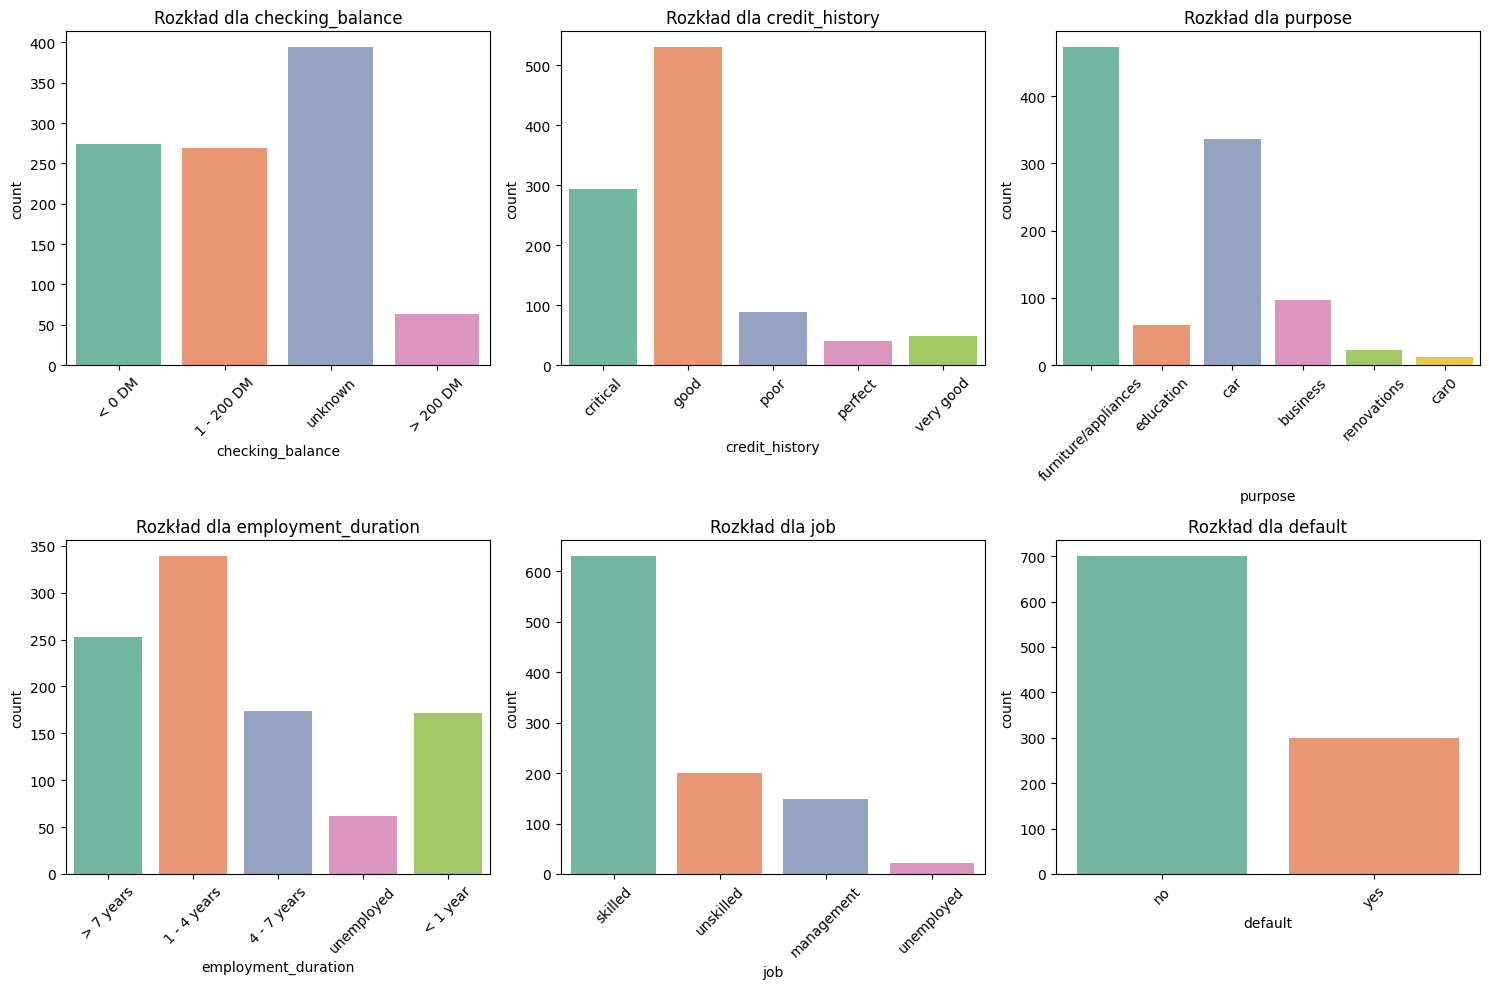

In [ ]:
# Lista zmiennych kategorycznych
kategoryczne_zmienne = ['checking_balance', 'credit_history', 'purpose', 'employment_duration', 'job', 'default']

# Tworzymy wykresy słupkowe dla zmiennych kategorycznych
plt.figure(figsize=(15, 10))
for i, zmienna in enumerate(kategoryczne_zmienne, 1):
    plt.subplot(2, 3, i)  # tworzymy siatkę wykresów 2x3
    sns.countplot(data=dane_surowe, x=zmienna, palette='Set2')
    plt.title(f'Rozkład dla {zmienna}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

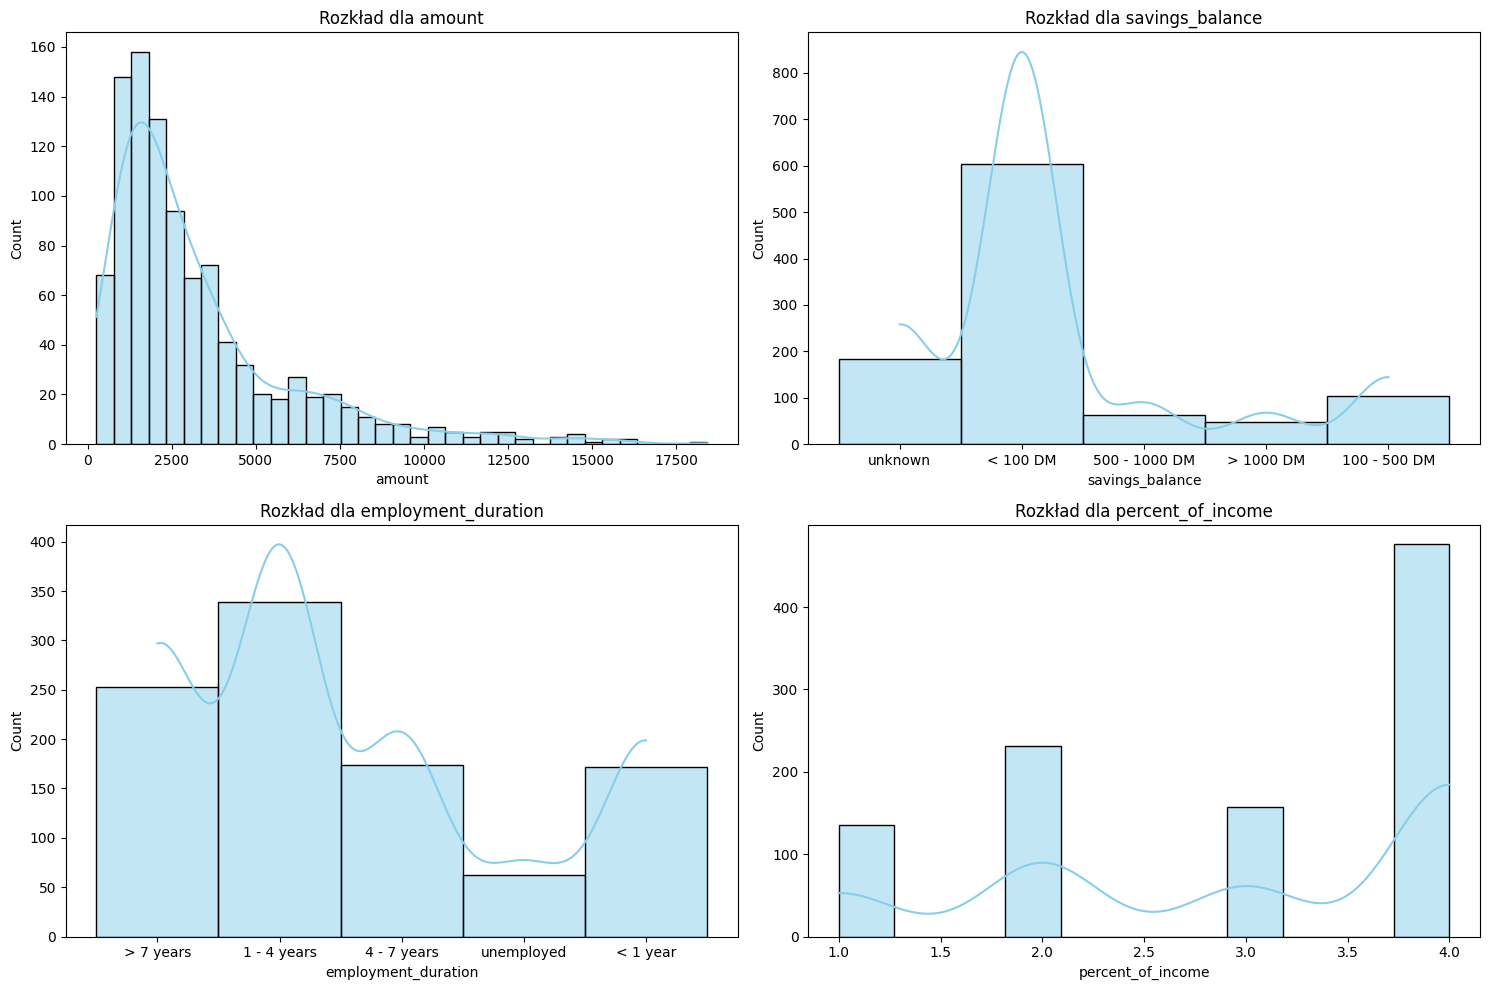

In [ ]:
# Lista zmiennych numerycznych
numeryczne_zmienne = ['amount', 'savings_balance', 'employment_duration', 'percent_of_income']

# Tworzymy histogramy dla zmiennych numerycznych
plt.figure(figsize=(15, 10))
for i, zmienna in enumerate(numeryczne_zmienne, 1):
    plt.subplot(2, 2, i)  # tworzymy siatkę wykresów 2x2
    sns.histplot(data=dane_surowe, x=zmienna, kde=True, color='skyblue')
    plt.title(f'Rozkład dla {zmienna}')

plt.tight_layout()
plt.show()


In [ ]:
# Wykresy rozrzutu dla zmiennych numerycznych
# aby wykonac wykresy zależności potrzebuję użyć arkusza, w którym dane są już przerobione na liczbowe
dane_liczbowe =  pd.read_excel("credit_koniec_v2.xlsx", sheet_name="liczbowe", engine="openpyxl")
print(dane_liczbowe.head())


   months_loan_duration  credit_history  amount  percent_of_income  \
0                     6               1    1169                  4   
1                    48               2    5951                  2   
2                    12               1    2096                  2   
3                    42               2    7882                  2   
4                    24               0    4870                  3   

   years_at_residence  age  existing_loans_count  job  default  \
0                   4   67                     2    2        0   
1                   2   22                     1    2        1   
2                   3   49                     1    2        0   
3                   4   45                     1    2        0   
4                   4   53                     2    1        1   

   checking_balance  savings_balance  employment_duration  
0                 0                0                    8  
1                82               39                    1  
2 

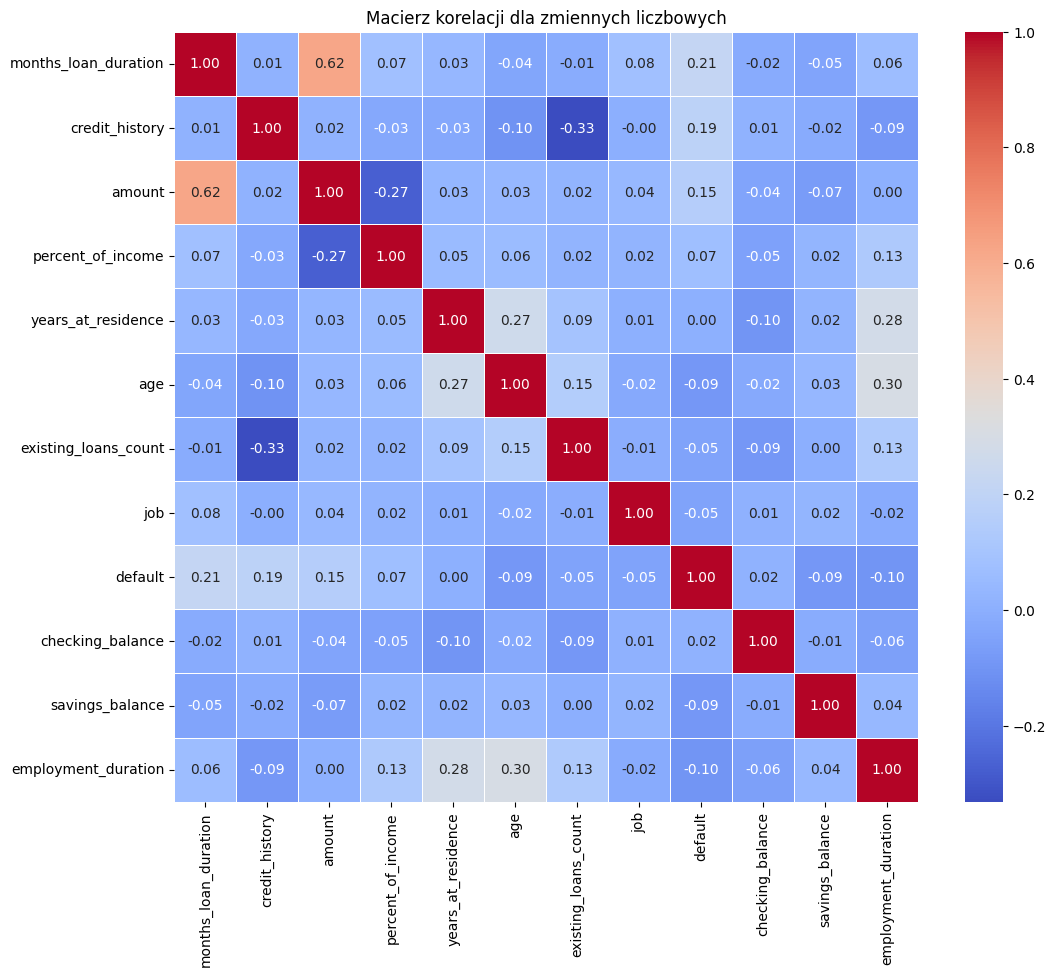

In [ ]:
# Obliczamy korelację między wszystkimi zmiennymi liczbowymi
corr_matrix = dane_liczbowe.corr()

# Tworzymy wykres ciepłej mapy dla macierzy korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji dla zmiennych liczbowych')
plt.show()


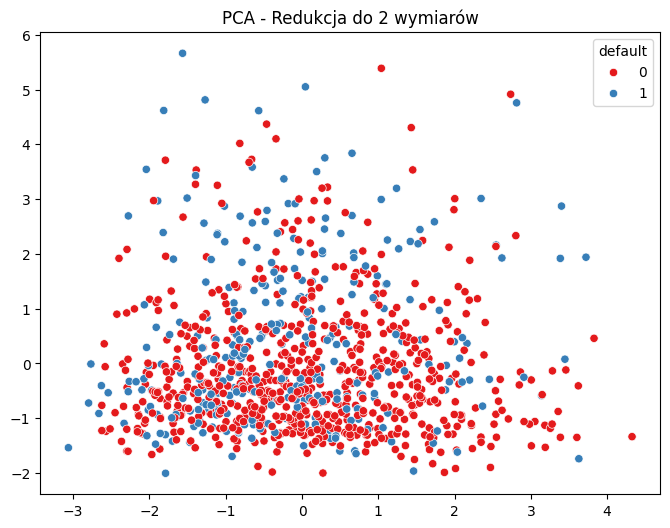

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


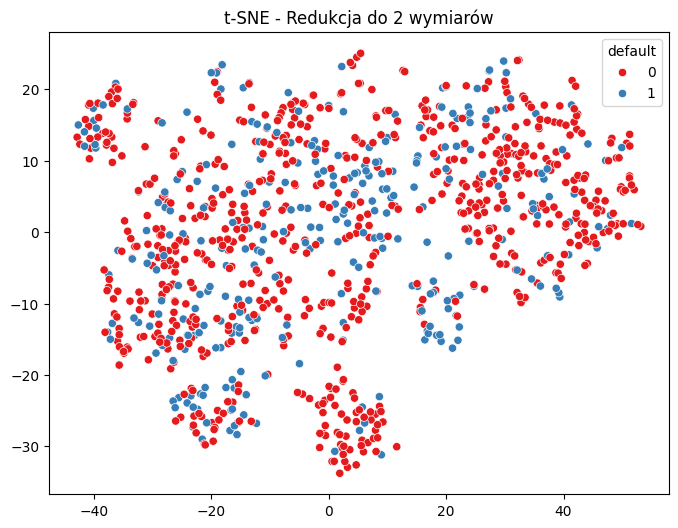

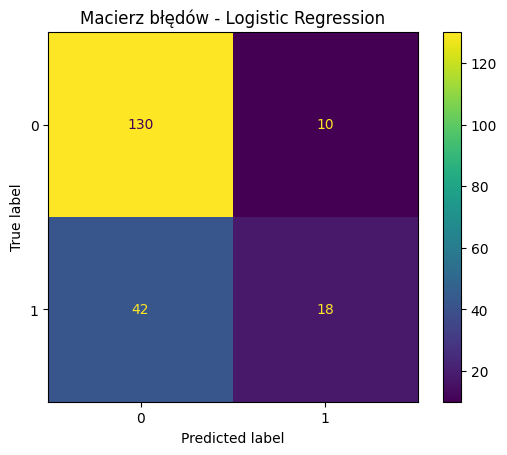

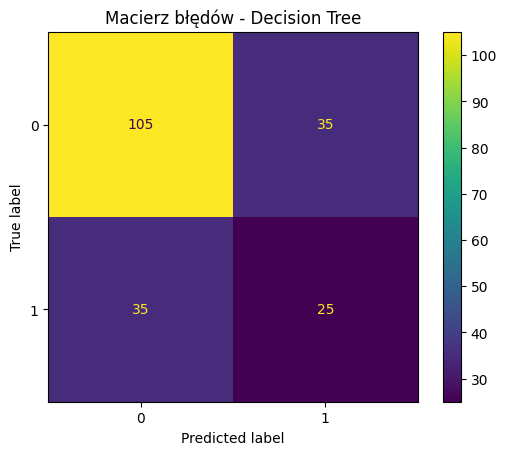

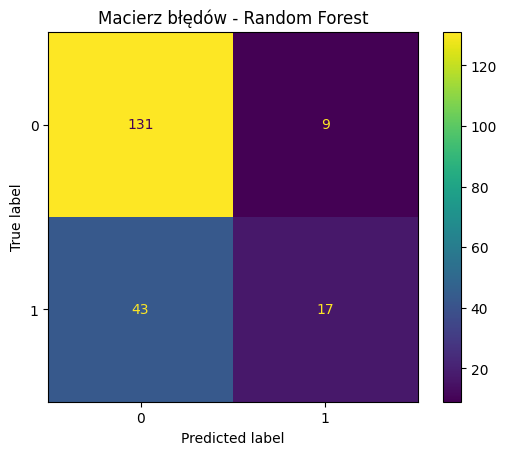

<ipython-input-8-4ca7bc622989>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_results, x="Model", y="Accuracy", palette="viridis")


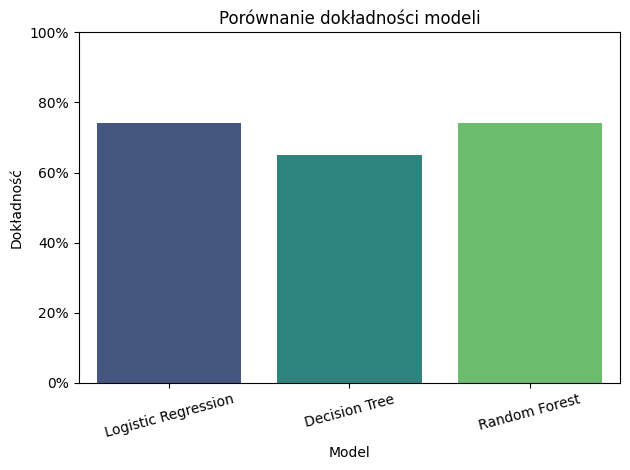

In [ ]:
#importy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- Wczytanie danych ---
dane = pd.read_excel("credit_koniec_v2.xlsx", sheet_name="liczbowe norm", engine="openpyxl")

# --- Podział danych ---
X = dane.drop('default', axis=1)
y = dane['default']
# --- Podział na zbiór treningowy i testowy ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# --- Skalowanie ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- PCA (na całym zbiorze) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.transform(X))  # skalujemy całe X
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title("PCA - Redukcja do 2 wymiarów")
plt.show()

# --- t-SNE (na całym zbiorze) ---
tsne = TSNE(n_components=2, random_state=21, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(scaler.transform(X))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1')
plt.title("t-SNE - Redukcja do 2 wymiarów")
plt.show()

# --- Modele ---
model_logreg = LogisticRegression(max_iter=1000, random_state=21)
model_logreg.fit(X_train_scaled, y_train)
pred_logreg_prob = model_logreg.predict_proba(X_test_scaled)[:, 1]
pred_class_logreg = (pred_logreg_prob > 0.5).astype(int)

model_tree = DecisionTreeClassifier(random_state=21)
model_tree.fit(X_train_scaled, y_train)
pred_tree_prob = model_tree.predict_proba(X_test_scaled)[:, 1]
pred_class_tree = (pred_tree_prob > 0.5).astype(int)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_rf_prob = model_rf.predict_proba(X_test_scaled)[:, 1]
pred_class_rf = (pred_rf_prob > 0.5).astype(int)

# --- Macierze błędów ---
models = {
    "Logistic Regression": pred_class_logreg,
    "Decision Tree": pred_class_tree,
    "Random Forest": pred_class_rf,
}
for name, pred in models.items():
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Macierz błędów - {name}")
    plt.show()

# --- Dokładności ---
accuracy_results = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_score(y_test, pred) for pred in models.values()]
})

sns.barplot(data=accuracy_results, x="Model", y="Accuracy", palette="viridis")
plt.title("Porównanie dokładności modeli")
plt.ylabel("Dokładność")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
!pip install imbalanced-learn


<ipython-input-11-85adac66c0d5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.index, y=corr_sorted.values, palette='coolwarm')


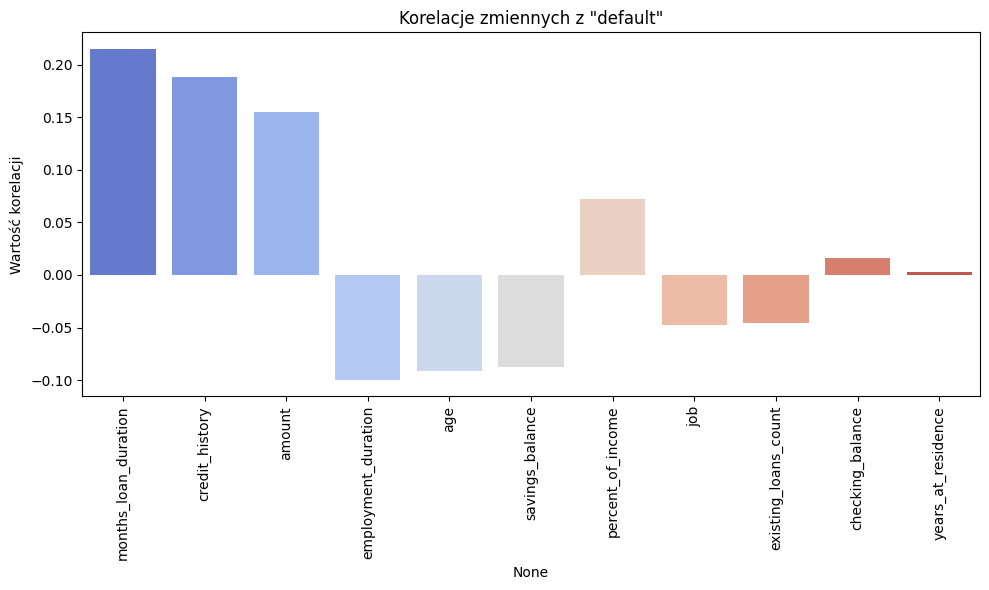

Najmocniej skorelowane zmienne z 'default':
months_loan_duration    0.215
credit_history          0.188
amount                  0.155
employment_duration    -0.100
age                    -0.091
savings_balance        -0.088
percent_of_income       0.072
job                    -0.047
existing_loans_count   -0.046
checking_balance        0.016
years_at_residence      0.003
Name: default, dtype: float64


In [ ]:
if 'default' in dane_liczbowe.columns:
    # Oblicz korelacje ze zmienną 'default'
    corr_default = dane_liczbowe.corr()['default'].drop('default')

    # Sortuj według wartości bezwzględnej
    corr_sorted = corr_default.reindex(corr_default.abs().sort_values(ascending=False).index)

    # Wyświetl wykres
    plt.figure(figsize=(10, 6))
    sns.barplot(x=corr_sorted.index, y=corr_sorted.values, palette='coolwarm')
    plt.title('Korelacje zmiennych z "default"')
    plt.ylabel('Wartość korelacji')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Wypisz korelacje liczbowo (np. do późniejszego użycia)
    print("Najmocniej skorelowane zmienne z 'default':")
    print(corr_sorted.round(3))


<ipython-input-12-2f67538d4659>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


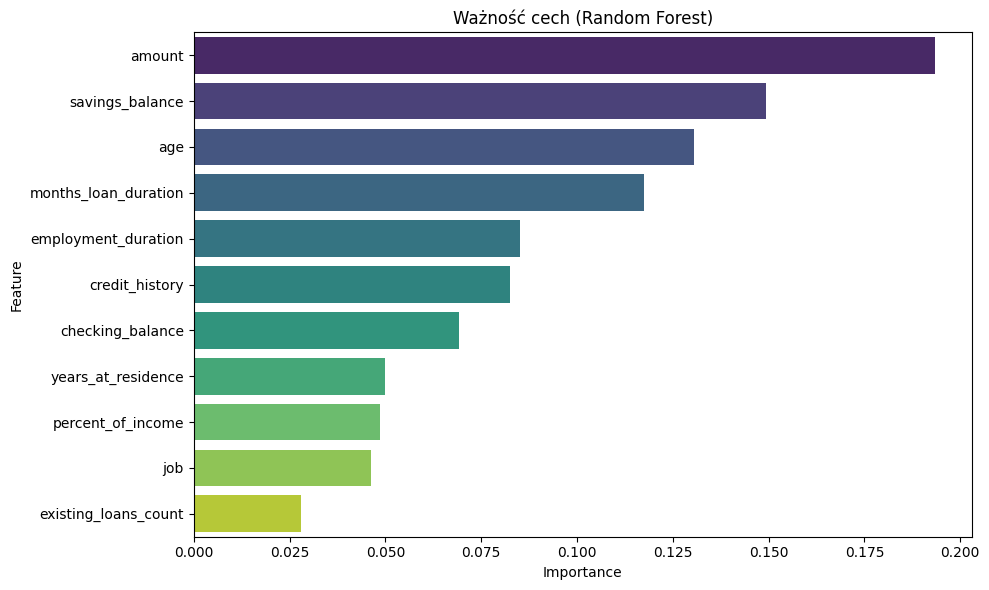

In [ ]:
importances = model_rf.feature_importances_
feature_names = X.columns
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title("Ważność cech (Random Forest)")
plt.tight_layout()
plt.show()


# Po wykresach i wynikach istotności cech wybieram te 6 kolumn do dalszej analizy aby poprawić model

amount

savings_balance

age

months_loan_duration

employment_duration

credit_history

Random Forest - najlepsze parametry z grid search: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
Random Forest - najlepsza średnia dokładność CV: 0.7312
Logistic Regression CV Accuracy: 0.6600 ± 0.0341
Decision Tree CV Accuracy: 0.6388 ± 0.0363

--- Logistic Regression ---
              precision    recall  f1-score   support

           0     0.8174    0.6714    0.7373       140
           1     0.4588    0.6500    0.5379        60

    accuracy                         0.6650       200
   macro avg     0.6381    0.6607    0.6376       200
weighted avg     0.7098    0.6650    0.6775       200



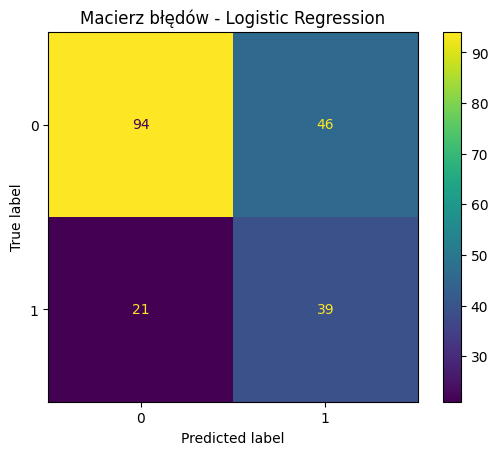


--- Decision Tree ---
              precision    recall  f1-score   support

           0     0.7219    0.7786    0.7491       140
           1     0.3673    0.3000    0.3303        60

    accuracy                         0.6350       200
   macro avg     0.5446    0.5393    0.5397       200
weighted avg     0.6155    0.6350    0.6235       200



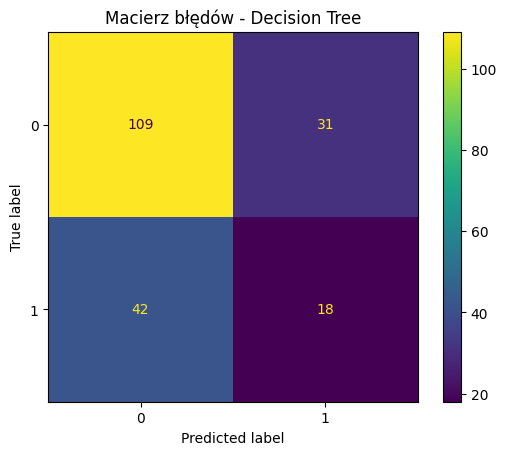


--- Random Forest (tuned) ---
              precision    recall  f1-score   support

           0     0.7582    0.8286    0.7918       140
           1     0.4894    0.3833    0.4299        60

    accuracy                         0.6950       200
   macro avg     0.6238    0.6060    0.6109       200
weighted avg     0.6775    0.6950    0.6832       200



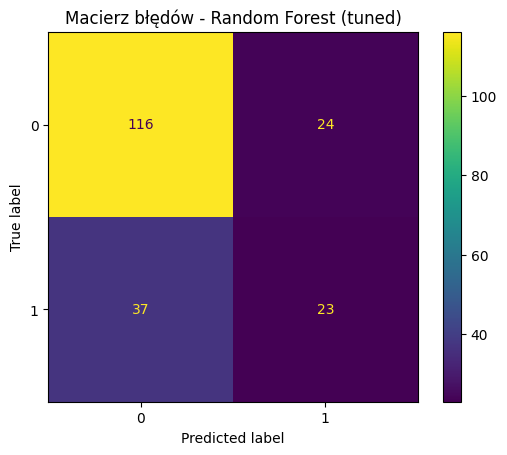


--- SVM ---
              precision    recall  f1-score   support

           0     0.8115    0.7071    0.7557       140
           1     0.4744    0.6167    0.5362        60

    accuracy                         0.6800       200
   macro avg     0.6429    0.6619    0.6460       200
weighted avg     0.7103    0.6800    0.6899       200



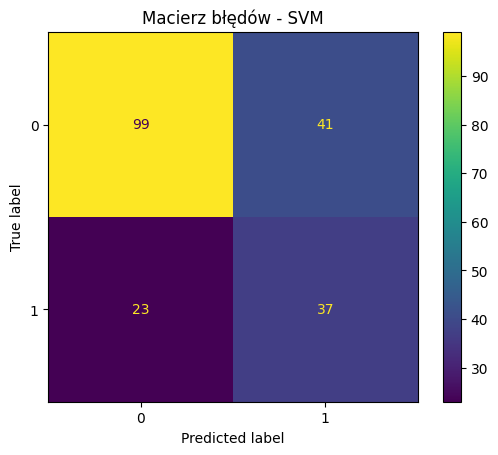


--- KNN ---
              precision    recall  f1-score   support

           0     0.7375    0.8429    0.7867       140
           1     0.4500    0.3000    0.3600        60

    accuracy                         0.6800       200
   macro avg     0.5938    0.5714    0.5733       200
weighted avg     0.6512    0.6800    0.6587       200



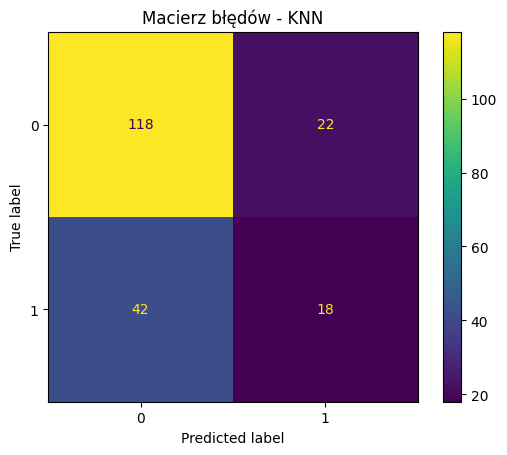

<ipython-input-19-e18e34877716>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_results, x="Model", y="Accuracy", palette="viridis")


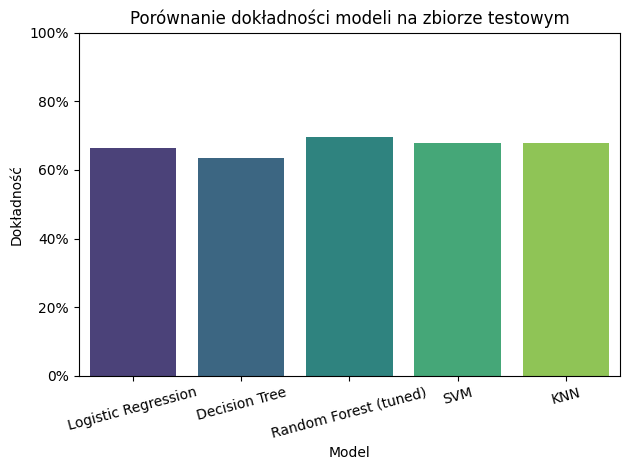

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- Wczytanie danych ---
dane = pd.read_excel("credit_koniec_v2.xlsx", sheet_name="liczbowe norm", engine="openpyxl")

# --- Wybór 6 cech ---
features = ['amount', 'savings_balance', 'age', 'months_loan_duration', 'employment_duration', 'credit_history']
X = dane[features]
y = dane['default']

# --- Podział danych ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# --- Skalowanie ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definicja modeli z class_weight='balanced' (dla drzew i logreg)
model_logreg = LogisticRegression(max_iter=1000, random_state=21, class_weight='balanced')
model_tree = DecisionTreeClassifier(random_state=21, class_weight='balanced')

# Random Forest z grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=21, class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Random Forest - najlepsze parametry z grid search:", grid_search.best_params_)
print(f"Random Forest - najlepsza średnia dokładność CV: {grid_search.best_score_:.4f}")

# Walidacja krzyżowa dla LogReg i DecisionTree
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
logreg_scores = cross_val_score(model_logreg, X_train_scaled, y_train, cv=cv, scoring='accuracy')
tree_scores = cross_val_score(model_tree, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f"Logistic Regression CV Accuracy: {np.mean(logreg_scores):.4f} ± {np.std(logreg_scores):.4f}")
print(f"Decision Tree CV Accuracy: {np.mean(tree_scores):.4f} ± {np.std(tree_scores):.4f}")

# Trenuj modele na całym zbiorze treningowym
model_logreg.fit(X_train_scaled, y_train)
model_tree.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_

# Predykcje na zbiorze testowym
pred_logreg = model_logreg.predict(X_test_scaled)
pred_tree = model_tree.predict(X_test_scaled)
pred_rf = best_rf.predict(X_test_scaled)

# Wyświetlenie wyników i macierzy pomyłek
models = {
    "Logistic Regression": pred_logreg,
    "Decision Tree": pred_tree,
    "Random Forest (tuned)": pred_rf,
}
# Definicje modeli SVM i KNN (SVM z class_weight='balanced', KNN bez)
model_svm = SVC(random_state=21, class_weight='balanced', probability=False)
model_knn = KNeighborsClassifier()

# Trening SVM i KNN na danych skalowanych
model_svm.fit(X_train_scaled, y_train)
model_knn.fit(X_train_scaled, y_train)

# Predykcje dla SVM i KNN
pred_svm = model_svm.predict(X_test_scaled)
pred_knn = model_knn.predict(X_test_scaled)

# Dodanie do słownika modeli
models.update({
    "SVM": pred_svm,
    "KNN": pred_knn
})

for name, pred in models.items():
    print(f"\n--- {name} ---")
    print(classification_report(y_test, pred, digits=4))
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap='viridis')
    plt.title(f"Macierz błędów - {name}")
    plt.show()

# Porównanie dokładności na zbiorze testowym
accuracy_results = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_score(y_test, pred) for pred in models.values()]
})

sns.barplot(data=accuracy_results, x="Model", y="Accuracy", palette="viridis")
plt.title("Porównanie dokładności modeli na zbiorze testowym")
plt.ylabel("Dokładność")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
# Definicje modeli SVM i KNN (SVM z class_weight='balanced', KNN bez)
model_svm = SVC(random_state=21, class_weight='balanced', probability=False)
model_knn = KNeighborsClassifier()

# Trening SVM i KNN na danych skalowanych
model_svm.fit(X_train_scaled, y_train)
model_knn.fit(X_train_scaled, y_train)

# Predykcje dla SVM i KNN
pred_svm = model_svm.predict(X_test_scaled)
pred_knn = model_knn.predict(X_test_scaled)

# Dodanie do słownika modeli
models.update({
    "SVM": pred_svm,
    "KNN": pred_knn
})


po wprowadzeniu optymalizacji


=== SVM ===
Accuracy:  72.00%
Precision: 53.85%
Recall:    46.67%
F1-score:  50.00%


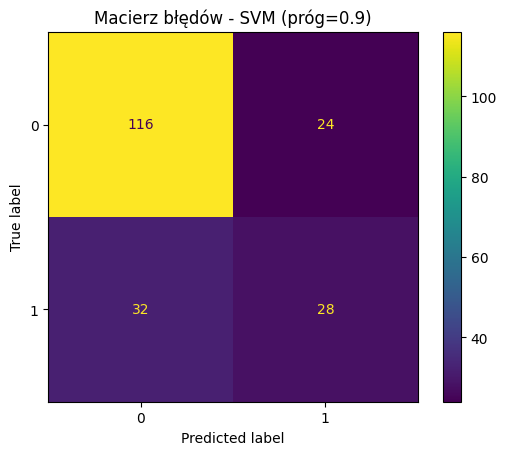

=== k-NN ===
Accuracy:  61.00%
Precision: 41.35%
Recall:    71.67%
F1-score:  52.44%


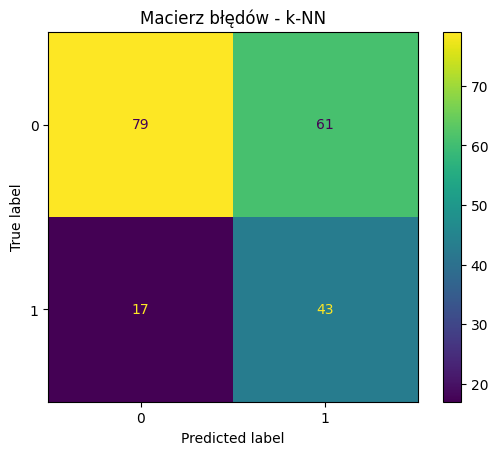

=== Random Forest ===
Accuracy:  67.50%
Precision: 47.06%
Recall:    66.67%
F1-score:  55.17%


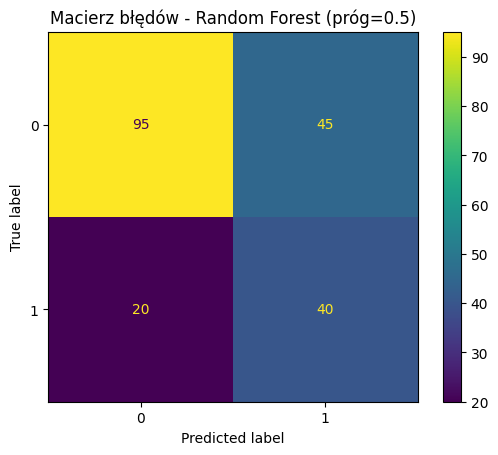

=== Regresja Logistyczna ===
Accuracy:  64.50%
Precision: 44.33%
Recall:    71.67%
F1-score:  54.78%


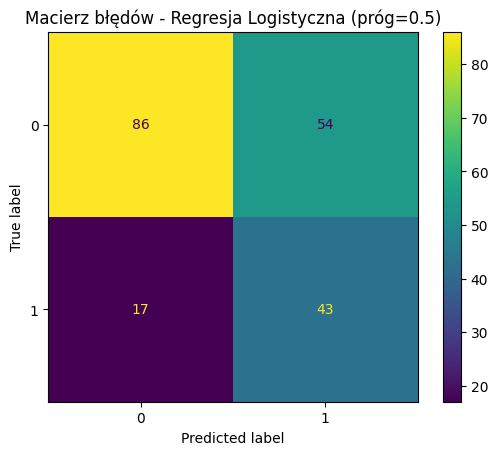

In [ ]:
# Importy

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt

# --- Balansowanie klas SMOTEENN ---
smoteenn = SMOTEENN(random_state=21)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_scaled, y_train)

# --- Model SVM ---
svm_model = SVC(probability=True, random_state=21)
svm_model.fit(X_resampled, y_resampled)

# Predykcja i ewaluacja SVM
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
threshold_svm = 0.9
y_pred_svm = (y_proba_svm > threshold_svm).astype(int)

print("=== SVM ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm):.2%}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.2%}")
print(f"Recall:    {recall_score(y_test, y_pred_svm):.2%}")
print(f"F1-score:  {f1_score(y_test, y_pred_svm):.2%}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm, display_labels=[0, 1]).plot(cmap='viridis')
plt.title(f"Macierz błędów - SVM (próg={threshold_svm})")
plt.show()

# --- Model k-NN ---
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_resampled, y_resampled)

# Predykcja i ewaluacja k-NN
y_pred_knn = knn_model.predict(X_test_scaled)

print("=== k-NN ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_knn):.2%}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2%}")
print(f"Recall:    {recall_score(y_test, y_pred_knn):.2%}")
print(f"F1-score:  {f1_score(y_test, y_pred_knn):.2%}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=[0, 1]).plot(cmap='viridis')
plt.title("Macierz błędów - k-NN")
plt.show()

# --- Model Random Forest ---
rf_model = RandomForestClassifier(random_state=21)
rf_model.fit(X_resampled, y_resampled)

# Predykcja i ewaluacja Random Forest
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
threshold_rf = 0.5
y_pred_rf = (y_proba_rf > threshold_rf).astype(int)

print("=== Random Forest ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.2%}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2%}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.2%}")
print(f"F1-score:  {f1_score(y_test, y_pred_rf):.2%}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=[0, 1]).plot(cmap='viridis')
plt.title(f"Macierz błędów - Random Forest (próg={threshold_rf})")
plt.show()

# --- Model Regresji Logistycznej ---
logreg_model = LogisticRegression(random_state=21, max_iter=1000)
logreg_model.fit(X_resampled, y_resampled)

# Predykcja i ewaluacja Regresji Logistycznej
y_proba_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]
threshold_logreg = 0.5
y_pred_logreg = (y_proba_logreg > threshold_logreg).astype(int)

print("=== Regresja Logistyczna ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_logreg):.2%}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.2%}")
print(f"Recall:    {recall_score(y_test, y_pred_logreg):.2%}")
print(f"F1-score:  {f1_score(y_test, y_pred_logreg):.2%}")

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm_logreg, display_labels=[0, 1]).plot(cmap='viridis')
plt.title(f"Macierz błędów - Regresja Logistyczna (próg={threshold_logreg})")
plt.show()


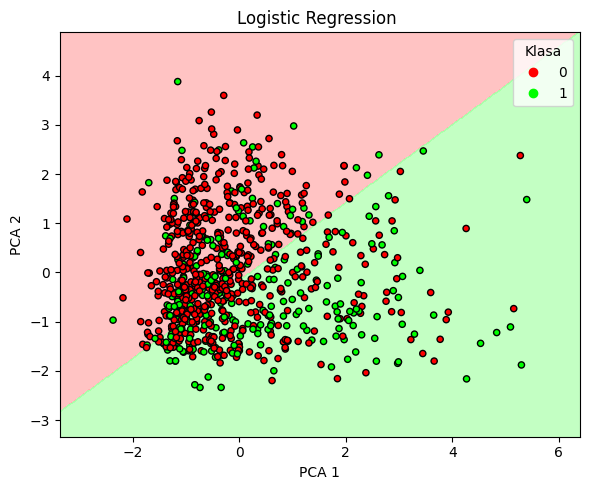

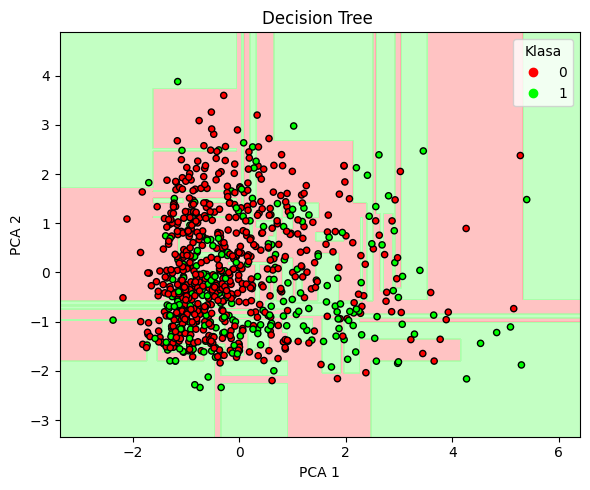

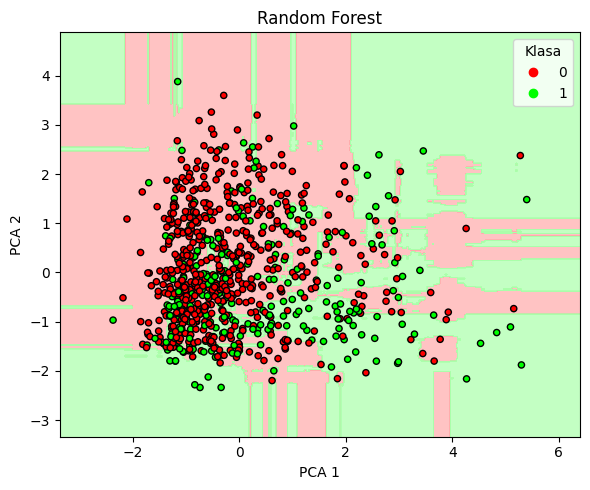

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# --- PCA (redukcja do 2 wymiarów) ---
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Trenuj modele na zredukowanych danych
model_logreg_pca = LogisticRegression(max_iter=1000, random_state=21, class_weight='balanced')
model_tree_pca = DecisionTreeClassifier(random_state=21, class_weight='balanced')
model_rf_pca = RandomForestClassifier(**grid_search.best_params_, random_state=21, class_weight='balanced')

model_logreg_pca.fit(X_train_pca, y_train)
model_tree_pca.fit(X_train_pca, y_train)
model_rf_pca.fit(X_train_pca, y_train)

# --- Funkcja do rysowania granic decyzyjnych ---
def plot_decision_boundary(model, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.7)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(*scatter.legend_elements(), title="Klasa")
    plt.tight_layout()
    plt.show()

# --- Granice decyzyjne ---
plot_decision_boundary(model_logreg_pca, X_train_pca, y_train, "Logistic Regression ")
plot_decision_boundary(model_tree_pca, X_train_pca, y_train, "Decision Tree ")
plot_decision_boundary(model_rf_pca, X_train_pca, y_train, "Random Forest")


--- Run 1 ---
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.83      0.66      0.73       140
           1       0.46      0.68      0.55        60

    accuracy                           0.67       200
   macro avg       0.64      0.67      0.64       200
weighted avg       0.72      0.67      0.68       200

--- Run 2 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       140
           1       0.50      0.70      0.58        60

    accuracy                           0.70       200
   macro avg       0.67      0.70      0.67       200
weighted avg       0.74      0.70      0.71       200

--- Run 3 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


              precision    recall  f1-score   support

           0       0.85      0.69      0.76       140
           1       0.49      0.72      0.59        60

    accuracy                           0.69       200
   macro avg       0.67      0.70      0.67       200
weighted avg       0.74      0.69      0.71       200

--- Run 4 ---


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


              precision    recall  f1-score   support

           0       0.83      0.69      0.75       140
           1       0.48      0.68      0.57        60

    accuracy                           0.69       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.73      0.69      0.70       200

--- Run 5 ---
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       140
           1       0.47      0.68      0.56        60

    accuracy                           0.68       200
   macro avg       0.65      0.68      0.65       200
weighted avg       0.72      0.68      0.69       200



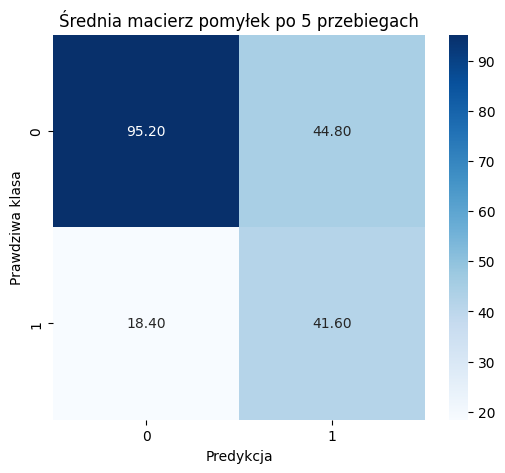

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


num_runs = 5
histories = []
reports = []
conf_matrices = []

for i in range(num_runs):
    print(f'--- Run {i+1} ---')
    # Tworzenie modelu od nowa
    model = Sequential()
    model.add(Dense(32, input_dim=X_resampled.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Trenowanie
    history = model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    histories.append(history)

    # Predykcja
    y_proba_nn = model.predict(X_test_scaled).ravel()
    y_pred_nn = (y_proba_nn > 0.5).astype(int)

    # Ewaluacja
    report = classification_report(y_test, y_pred_nn, output_dict=True)
    reports.append(report)
    print(classification_report(y_test, y_pred_nn))

    # Liczymy macierz pomyłek i dodajemy do listy
    cm = confusion_matrix(y_test, y_pred_nn)
    conf_matrices.append(cm)

# Sumujemy i uśredniamy macierze pomyłek
sum_cm = np.sum(conf_matrices, axis=0)
avg_cm = sum_cm / num_runs

plt.figure(figsize=(6,5))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predykcja')
plt.ylabel('Prawdziwa klasa')
plt.title('Średnia macierz pomyłek po 5 przebiegach')
plt.show()


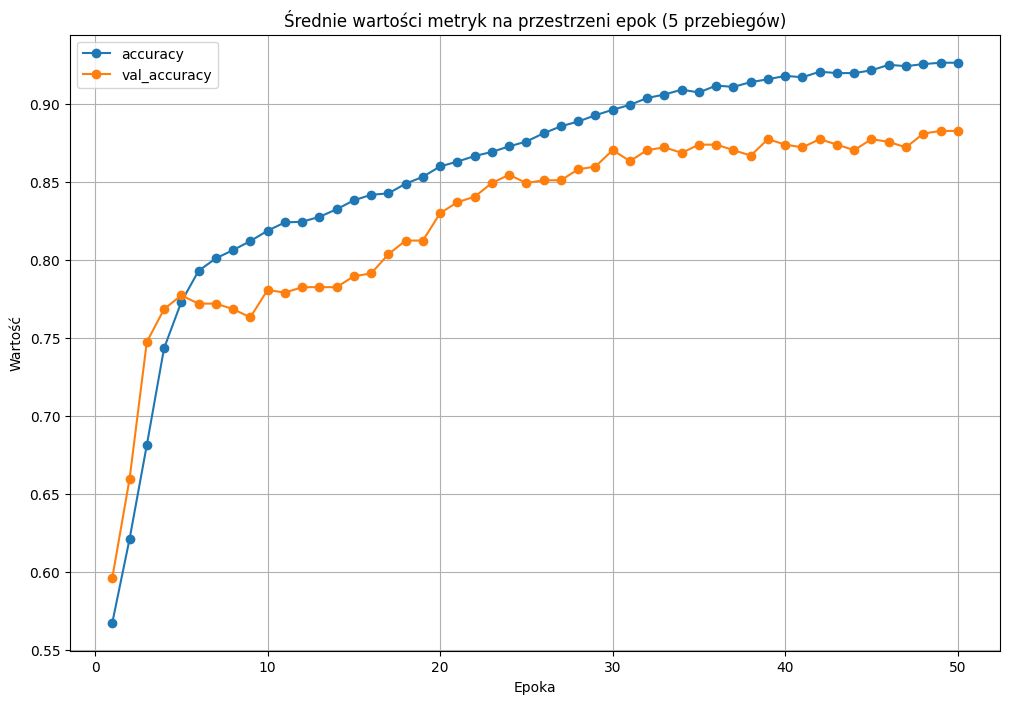

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pobierz wszystkie dostępne klucze z historii (np. 'accuracy', 'val_accuracy')
metrics = histories[0].history.keys()

epochs = range(1, len(histories[0].history['val_accuracy']) + 1)

plt.figure(figsize=(12, 8))

for metric in metrics:
    # Pomijamy metryki, które zawierają 'loss' w nazwie
    if 'loss' in metric:
        continue

    # Pobierz metrykę dla wszystkich przebiegów i uśrednij
    metric_values = np.array([h.history[metric] for h in histories])
    mean_metric = np.mean(metric_values, axis=0)
    plt.plot(epochs, mean_metric, marker='o', label=metric)

plt.title('Średnie wartości metryk na przestrzeni epok (5 przebiegów)')
plt.xlabel('Epoka')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()
